<h1 align=center><font size = 5> Identifying persons of interest in data </font> </h1>

<h2 align=center>Synopsis</h2>

**Enron was one of the largest sellers of natural gas in North America in the early 1990s, and was rated the most innovative large company in America in a Fortune's Most Admired Companies survey in the early 2000s. Although they achieved record revenues during that time span, by 2002 they had gone bankrupt due to corporate fraud.  In this project, I will be investigating financial and email data from Enron, in an attempt to construct a person of interest identifier.**

### Sources
* Data source 1 : https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz 
* Data source 2 : https://github.com/udacity/ud120-projects

**Variable meaning**
* Poi: A person of interest. Binary indicator (True = 0, False = 1)

**Email data**
* to_messages: number of messages sent to employee.
* from_messages: number of messages sent by employee .
* from_this_person_to_poi: number of messages sent employee to a poi.
* email_address: email address of employee.
* from_poi_to_this_person: number of emails sent from a poi to employee.
* shared_receipt_with_poi: Number of shared emails between person and poi (excludes emplyee from count if they are a poi  themselves)


**Financial dataset**
* salary: Reflects items like base salary, excutive cash allowances and benefits payments
* deferral_payments: deferred compensation arrangements due to termination of employment or due to in-service withdrawals as per plan provisions.
* total_payments: Sum total of all monetary exchanges (includes all kinds of payments except stocks)
* exercised_stock_options: Reflects amounts from exercised stock options.
* bonus: Reflects annual cash incentives paid based upon company performance (may include retention payments)
* restricted_stock: Reflects gross fair market value of shares and accrued dividends (and/or phantom units and dividend equivalents) on the date of release due to lapse of vesting periods, regardless of whether deferred.
* restricted_stock_deferred: value of restricted stock voluntarily deferred prior to release under a deferred compensation arrangement.
* total_stock_value: Reflects total stock value
* expenses: Reflects reimbursements of business expenses (may include consulting services fees)
* loan_advances: Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment (stocks can be used in some cases).
* other: items such as payments for severance, consulting services, relocation costs, tax advances and allowances for employees on international assignment.
* director_fees: Reflects cash payments and/or value of stock grants made in lieu of cash payments to non-employee directors.
* deferred_income: Reflects voluntary executive deferrals of salary, annual cash incentives, and long-term cash incentives as well as cash fees deferred by non-employee directors under a deferred compensation arrangement.
* long_term_incentive: Reflects long-term incentive cash payments from various long-term incentive programs designed to tie executive compensation to long-term success.

### Exploring data

In [1]:
import sys
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint as pp
import seaborn as sns
sns.set()

path = r"..\..\Udacity\Intro_to_machine_learning\ud120-projects-master\final_project"

Load in the enron data

In [2]:
pick_file = os.path.join(path,"final_project_dataset.pkl")
data = pickle.load(open(pick_file,'rb'))

Data is a dictionary containing financial information on different employees within Enron. Convert to a dataframe

In [3]:
df = pd.DataFrame(data)
df.head()

,METTS MARK,BAXTER JOHN C,ELLIOTT STEVEN,CORDES WILLIAM R,HANNON KEVIN P,MORDAUNT KRISTINA M,MEYER ROCKFORD G,MCMAHON JEFFREY,HAEDICKE MARK E,PIPER GREGORY F,...,SAVAGE FRANK,IZZO LAWRENCE L,TILNEY ELIZABETH A,MARTIN AMANDA K,BUY RICHARD B,GRAMM WENDY L,CAUSEY RICHARD A,TAYLOR MITCHELL S,DONAHUE JR JEFFREY M,GLISAN JR BEN F
salary,365788,267102,170941,NaN,243293,267093,NaN,370448,374125,197091,...,NaN,85274,247338,349487,330546,NaN,415189,265214,278601,274975
to_messages,807,NaN,NaN,764,1045,NaN,232,2355,4009,1238,...,NaN,496,460,1522,3523,NaN,1892,533,865,873
deferral_payments,NaN,1295738,NaN,NaN,NaN,NaN,1848227,NaN,2157527,1130036,...,NaN,NaN,NaN,85430,649584,NaN,NaN,227449,NaN,NaN
total_payments,1061827,5634343,211725,NaN,288682,628522,1848227,4099771,3859065,1737629,...,3750,1979596,399393,8407016,2355702,119292,1868758,1092663,875760,1272284
loan_advances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Transpose to get the indexes as column headers

In [4]:
df = df.T
df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


### Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     146 non-null    object
 1   to_messages                146 non-null    object
 2   deferral_payments          146 non-null    object
 3   total_payments             146 non-null    object
 4   loan_advances              146 non-null    object
 5   bonus                      146 non-null    object
 6   email_address              146 non-null    object
 7   restricted_stock_deferred  146 non-null    object
 8   deferred_income            146 non-null    object
 9   total_stock_value          146 non-null    object
 10  expenses                   146 non-null    object
 11  from_poi_to_this_person    146 non-null    object
 12  exercised_stock_options    146 non-null    object
 13  from_messages              146 non-null    object

Values are all objects, including the numerical values. Convert them them to floats since we have NAN types

In [7]:
# Make a list of the headers
attributes = df.columns
pp.pprint(attributes,indent=3)

Index(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees'],
      dtype='object')


In [8]:
# Create new data frame 
df2 = pd.DataFrame()

In [9]:
# Convert to float
for l in attributes:
    if l != "email_address":
         df2[l] = df[l].astype("float")
    else:   
        df2[l] = df[l]

In [10]:
df2.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,NaN,1061827.0,NaN,600000.0,mark.metts@enron.com,NaN,NaN,585062.0,...,38.0,NaN,29.0,1740.0,1.0,0.0,NaN,702.0,585062.0,NaN
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,...,NaN,6680544.0,NaN,2660303.0,NaN,0.0,1586055.0,NaN,3942714.0,NaN
ELLIOTT STEVEN,170941.0,NaN,NaN,211725.0,NaN,350000.0,steven.elliott@enron.com,NaN,-400729.0,6678735.0,...,NaN,4890344.0,NaN,12961.0,NaN,0.0,NaN,NaN,1788391.0,NaN
CORDES WILLIAM R,NaN,764.0,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185.0,...,10.0,651850.0,12.0,NaN,0.0,0.0,NaN,58.0,386335.0,NaN
HANNON KEVIN P,243293.0,1045.0,NaN,288682.0,NaN,1500000.0,kevin.hannon@enron.com,NaN,-3117011.0,6391065.0,...,32.0,5538001.0,32.0,11350.0,21.0,1.0,1617011.0,1035.0,853064.0,NaN


Cross check conversion from objects has been done correctly. Then processed with descriptive statistics

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              146 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

In [12]:
df2.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,4.000000e+00,8.200000e+01,1.800000e+01,4.900000e+01,1.260000e+02,9.500000e+01,86.000000,1.020000e+02,86.000000,9.300000e+01,86.000000,146.000000,6.600000e+01,86.000000,1.100000e+02,1.700000e+01
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,4.196250e+07,2.374235e+06,1.664106e+05,-1.140475e+06,6.773957e+06,1.087289e+05,64.895349,5.987054e+06,608.790698,9.190650e+05,41.232558,0.123288,1.470361e+06,1176.465116,2.321741e+06,1.668049e+05
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,4.708321e+07,1.071333e+07,4.201494e+06,4.025406e+06,3.895777e+07,5.335348e+05,86.979244,3.106201e+07,1841.033949,4.589253e+06,100.073111,0.329899,5.942759e+06,1178.317641,1.251828e+07,3.198914e+05
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,4.000000e+05,7.000000e+04,-7.576788e+06,-2.799289e+07,-4.409300e+04,1.480000e+02,0.000000,3.285000e+03,12.000000,2.000000e+00,0.000000,0.000000,6.922300e+04,2.000000,-2.604490e+06,3.285000e+03
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,1.600000e+06,4.312500e+05,-3.896218e+05,-6.948620e+05,4.945102e+05,2.261400e+04,10.000000,5.278862e+05,22.750000,1.215000e+03,1.000000,0.000000,2.812500e+05,249.750000,2.540180e+05,9.878400e+04
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,4.176250e+07,7.693750e+05,-1.469750e+05,-1.597920e+05,1.102872e+06,4.695000e+04,35.000000,1.310814e+06,41.000000,5.238200e+04,8.000000,0.000000,4.420350e+05,740.500000,4.517400e+05,1.085790e+05
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,8.212500e+07,1.200000e+06,-7.500975e+04,-3.834600e+04,2.949847e+06,7.995250e+04,72.250000,2.547724e+06,145.500000,3.620960e+05,24.750000,0.000000,9.386720e+05,1888.250000,1.002370e+06,1.137840e+05
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,8.392500e+07,9.734362e+07,1.545629e+07,-8.330000e+02,4.345095e+08,5.235198e+06,528.000000,3.117640e+08,14368.000000,4.266759e+07,609.000000,1.000000,4.852193e+07,5521.000000,1.303223e+08,1.398517e+06


The maximum values are significantly greater than the mean for some of the features, higlighting the presence of a possible outlier. Let's make a plot of salary and bonus as they are related features

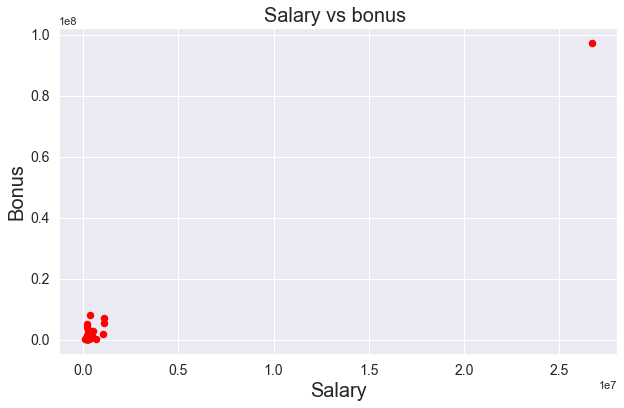

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(df2.salary, df2.bonus, c="red",linewidth=1.5,alpha=1);
plt.title("Salary vs bonus ",fontsize=20)
plt.xlabel("Salary",fontsize=20)
plt.ylabel("Bonus",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Find the maximum value and remove from dataframe

In [15]:
df2[["salary","bonus"]].idxmax(axis = 0)

salary    TOTAL
bonus     TOTAL
dtype: object

This "TOTAL" value corresponds to the total value for every person in list. Thus should be removed

In [16]:
df2.drop(labels='TOTAL',axis=0,inplace=True)

In [17]:
df2.describe()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,9.400000e+01,86.000000,3.800000e+01,1.240000e+02,3.000000e+00,8.100000e+01,1.700000e+01,4.800000e+01,1.250000e+02,94.000000,86.000000,1.010000e+02,86.000000,9.200000e+01,86.000000,145.000000,6.500000e+01,86.000000,1.090000e+02,16.000000
mean,2.840875e+05,2073.860465,8.416025e+05,2.623421e+06,2.797500e+07,1.201773e+06,6.218928e+05,-5.810498e+05,3.352073e+06,54192.010638,64.895349,2.959559e+06,608.790698,4.652767e+05,41.232558,0.124138,7.464912e+05,1176.465116,1.147424e+06,89822.875000
std,1.771311e+05,2582.700981,1.289323e+06,9.488106e+06,4.638256e+07,1.441679e+06,3.845528e+06,9.420764e+05,6.532883e+06,46108.377454,86.979244,5.499450e+06,1841.033949,1.389719e+06,100.073111,0.330882,8.629174e+05,1178.317641,2.249770e+06,41112.700735
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,4.000000e+05,7.000000e+04,-1.787380e+06,-3.504386e+06,-4.409300e+04,148.000000,0.000000,3.285000e+03,12.000000,2.000000e+00,0.000000,0.000000,6.922300e+04,2.000000,-2.604490e+06,3285.000000
25%,2.118020e+05,541.250000,7.964450e+04,3.863802e+05,1.200000e+06,4.250000e+05,-3.298250e+05,-6.112092e+05,4.941360e+05,22479.000000,10.000000,5.067650e+05,22.750000,1.209000e+03,1.000000,0.000000,2.750000e+05,249.750000,2.520550e+05,83674.500000
50%,2.587410e+05,1211.000000,2.210635e+05,1.100246e+06,2.000000e+06,7.500000e+05,-1.402640e+05,-1.519270e+05,1.095040e+06,46547.500000,35.000000,1.297049e+06,41.000000,5.198450e+04,8.000000,0.000000,4.221580e+05,740.500000,4.410960e+05,106164.500000
75%,3.086065e+05,2634.750000,8.672112e+05,2.084663e+06,4.176250e+07,1.200000e+06,-7.241900e+04,-3.792600e+04,2.606763e+06,78408.500000,72.250000,2.542813e+06,145.500000,3.575772e+05,24.750000,0.000000,8.318090e+05,1888.250000,9.850320e+05,112815.000000
max,1.111258e+06,15149.000000,6.426990e+06,1.035598e+08,8.152500e+07,8.000000e+06,1.545629e+07,-8.330000e+02,4.911008e+07,228763.000000,528.000000,3.434838e+07,14368.000000,1.035973e+07,609.000000,1.000000,5.145434e+06,5521.000000,1.476169e+07,137864.000000


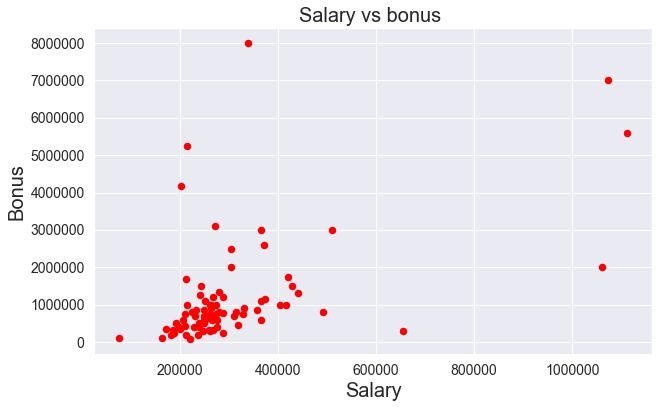

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(df2.salary, df2.bonus, c="red",linewidth=1.5,alpha=1);
plt.title("Salary vs bonus ",fontsize=20)
plt.xlabel("Salary",fontsize=20)
plt.ylabel("Bonus",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Create a box plot to be sure that outliers are removed. Outliers are usually greater or less than 1.5 X interquartile range

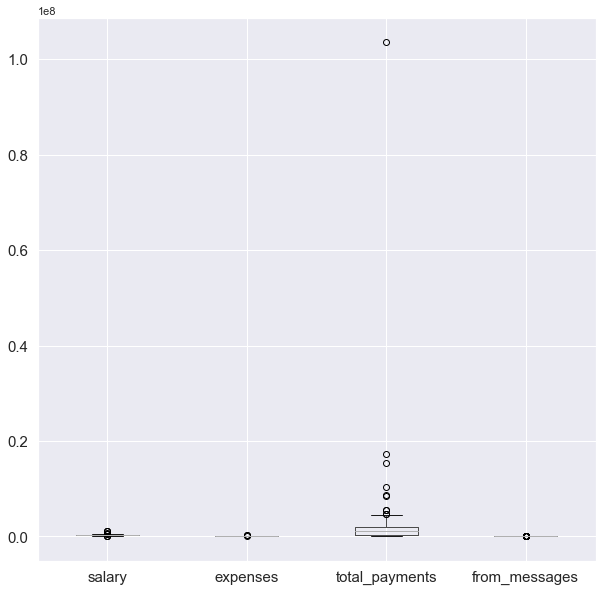

In [19]:
boxplot = df2.boxplot(column=['salary', 'expenses', 'total_payments','from_messages'], fontsize=15,figsize=(10,10))

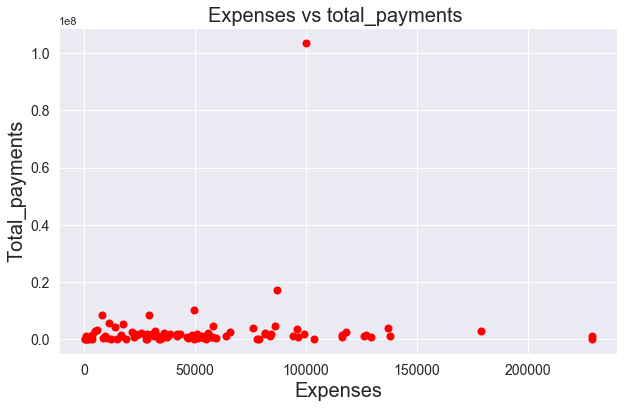

In [20]:
plt.figure(figsize=(10,6))

plt.scatter(df2.expenses, df2.total_payments, c="red",linewidth=2,alpha=1);
plt.title("Expenses vs total_payments ",fontsize=20)
plt.xlabel("Expenses",fontsize=20)
plt.ylabel("Total_payments",fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [21]:
df2["total_payments"].idxmax(axis=0)

'LAY KENNETH L'

It might be tempting to get rid of this value, but it is prudent to check if this is a person of interest.

In [22]:
df2.loc['LAY KENNETH L']

salary                                 1.07232e+06
to_messages                                   4273
deferral_payments                           202911
total_payments                          1.0356e+08
loan_advances                           8.1525e+07
bonus                                        7e+06
email_address                kenneth.lay@enron.com
restricted_stock_deferred                      NaN
deferred_income                            -300000
total_stock_value                      4.91101e+07
expenses                                     99832
from_poi_to_this_person                        123
exercised_stock_options                3.43484e+07
from_messages                                   36
other                                  1.03597e+07
from_this_person_to_poi                         16
poi                                              1
long_term_incentive                        3.6e+06
shared_receipt_with_poi                       2411
restricted_stock               

We have a highly unbalanced dataset (only 18 poi), and it could be that persons of interest stand out significantly from the crowd. I will therefore treat this data point as a normal observation as it could reveal a pattern about persons of interest e.g if they all earn much higher salaries on average. Let's make one more look through the employee names to be sure we only have employees

In [23]:
for l in df2.index.values:
    print(l)

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HAEDICKE MARK E
PIPER GREGORY F
HUMPHREY GENE E
NOLES JAMES L
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUCE
LINDHOLM TOD A
M

A look through the list of employees reveals an employee called `THE TRAVEL AGENCY IN THE PARK` in the part. This most likely not a legitimate employee and this data point will be removed. In fact `THE TRAVEL AGENCY IN THE PARK`referred to a business entity co-owned by the sister of Enron's former Chairman, to which payments were made by Enron employees on account of business-related travel. 

In [24]:
df2.loc['THE TRAVEL AGENCY IN THE PARK']

salary                          NaN
to_messages                     NaN
deferral_payments               NaN
total_payments               362096
loan_advances                   NaN
bonus                           NaN
email_address                   NaN
restricted_stock_deferred       NaN
deferred_income                 NaN
total_stock_value               NaN
expenses                        NaN
from_poi_to_this_person         NaN
exercised_stock_options         NaN
from_messages                   NaN
other                        362096
from_this_person_to_poi         NaN
poi                               0
long_term_incentive             NaN
shared_receipt_with_poi         NaN
restricted_stock                NaN
director_fees                   NaN
Name: THE TRAVEL AGENCY IN THE PARK, dtype: object

The lack of information the other features except total_payments highlights the above point about this data point. It will be dropped from the analysis

In [25]:
df2.drop(labels='THE TRAVEL AGENCY IN THE PARK',axis=0,inplace=True)

## Data engineering

Get descriptive statistics one more time

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     94 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          38 non-null     float64
 3   total_payments             123 non-null    float64
 4   loan_advances              3 non-null      float64
 5   bonus                      81 non-null     float64
 6   email_address              144 non-null    object 
 7   restricted_stock_deferred  17 non-null     float64
 8   deferred_income            48 non-null     float64
 9   total_stock_value          125 non-null    float64
 10  expenses                   94 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    101 non-null    float64
 13  from_messages              86 non-

In the descriptive statistics, a couple of the features were missing over 50% of their data. **restricted_stock_deferred, deferral_payments, loan_advances, deferred_income, long_term_incentive and director_fees"**. These will be dropped

In [27]:
df2.drop(columns=['deferral_payments', 'loan_advances','email_address', 
                  'restricted_stock_deferred','director_fees','deferred_income','long_term_incentive'],inplace=True)

Let's see the correlation matrix 

(14.5, -0.5)

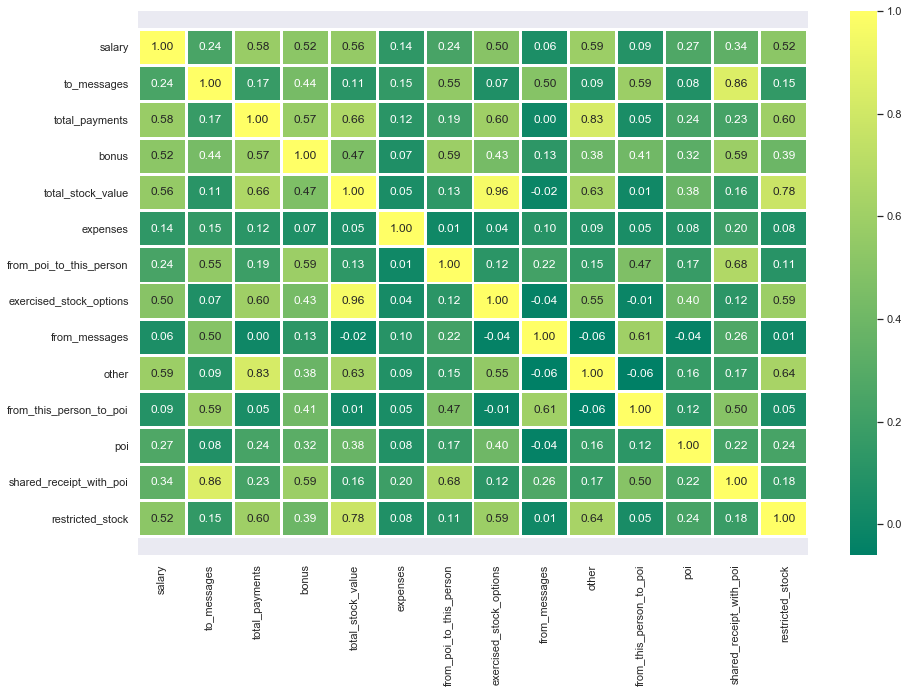

In [39]:
corr_matrix = df2.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=2.0,
                fmt=".2f",
                cmap="summer")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

The features related to **salary**, monetary incentives etc appear to have bery strong correlations with each other. However, keep in mind there is still the issue of missing values. Since some of our pois might actually be outliers since they differ from the non pois, I will impute the missing values with the median instead.

In [33]:
df2.fillna(df2.median(),inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary                   144 non-null    float64
 1   to_messages              144 non-null    float64
 2   total_payments           144 non-null    float64
 3   bonus                    144 non-null    float64
 4   total_stock_value        144 non-null    float64
 5   expenses                 144 non-null    float64
 6   from_poi_to_this_person  144 non-null    float64
 7   exercised_stock_options  144 non-null    float64
 8   from_messages            144 non-null    float64
 9   other                    144 non-null    float64
 10  from_this_person_to_poi  144 non-null    float64
 11  poi                      144 non-null    float64
 12  shared_receipt_with_poi  144 non-null    float64
 13  restricted_stock         144 non-null    float64
dtypes: float64

Let's see the correlations after imputation

(14.5, -0.5)

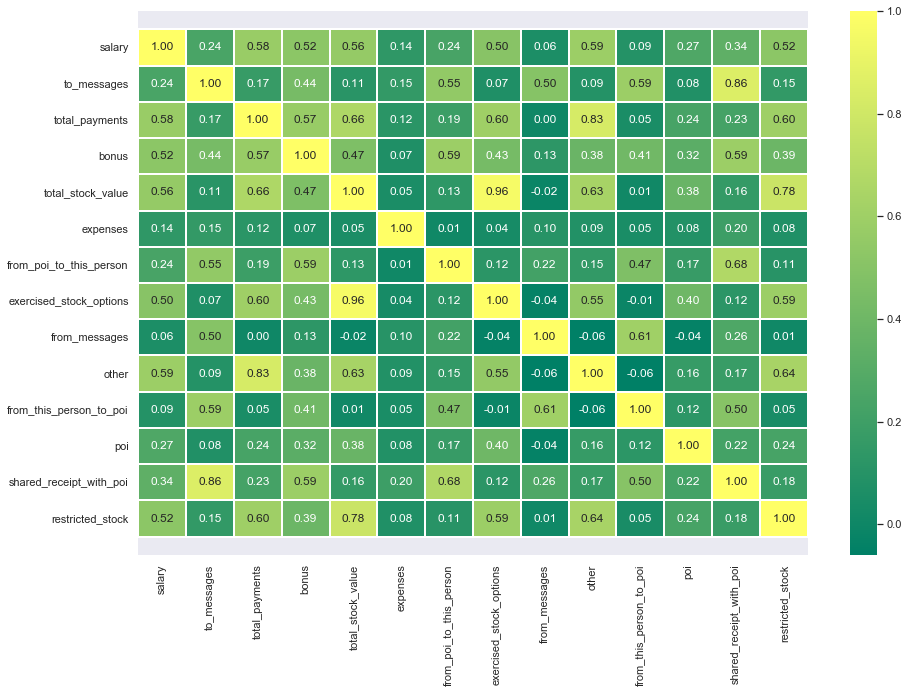

In [40]:
corr_matrix = df2.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=1.0,
                fmt=".2f",
                cmap="summer")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

Let's have a quick look at the data one more time

In [41]:
df2.head()

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock
METTS MARK,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,1297049.0,29.0,1740.0,1.0,0.0,702.0,585062.0
BAXTER JOHN C,267102.0,1211.0,5634343.0,1200000.0,10623258.0,11200.0,35.0,6680544.0,41.0,2660303.0,8.0,0.0,740.5,3942714.0
ELLIOTT STEVEN,170941.0,1211.0,211725.0,350000.0,6678735.0,78552.0,35.0,4890344.0,41.0,12961.0,8.0,0.0,740.5,1788391.0
CORDES WILLIAM R,258741.0,764.0,1101393.0,750000.0,1038185.0,46547.5,10.0,651850.0,12.0,51587.0,0.0,0.0,58.0,386335.0
HANNON KEVIN P,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,1.0,1035.0,853064.0


It appears some of the features are fairly highly correlated with each other. This is because some of the features contain very similar information. For instance, total_payments is the sum total of every type of payment except stock options. Total_stock_value conversely refers to the sum total of stock options. So how could we proceed? We can create new non linear features to minimize colinearity in our data. That's because Co-linearity can result in wildly varying and unstable solutions in the machine learning algorithm.

**Features to add**
* frac_messages_from_poi = from_poi_to_this_person/to_messages (Fraction of emails an individual receives that's from a poi)
* frac_messages_to_poi = from_this_person_to_poi/from_messages (Fraction of emails an individual sends that's to a poi)
* relative_bonus = total_payments/bonus (compares bonuses received to total payments)
* relative_salary = total_payments/salary (compares salaries received to total payments)
* relative_exercised_stock_option = total_stock_value/exerciesd_stock_options
* relative_restricted_stock_option = total_stock_value/restricted_stock

Relative features are a powerful way of introducing more information while minimizing the probability of increasing co-linearity amongst the features

In [42]:
# Add features
df2['frac_messages_from_poi'] = df2['from_poi_to_this_person']/df2['to_messages']
df2['frac_messages_to_poi'] = df2['from_this_person_to_poi']/df2['from_messages']
df2['relative_bonus'] = df2['total_payments']/df2['bonus']
df2['relative_salary'] = df2['total_payments']/df2['salary']
df2['relative_exercised_stock_option'] = df2['total_stock_value']/df2['exercised_stock_options']
df2['relative_restricted_stock_option'] = df2['total_stock_value']/df2['restricted_stock']

In [63]:
df2.head()

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock,frac_messages_from_poi,frac_messages_to_poi,relative_bonus,relative_salary,relative_exercised_stock_option,relative_restricted_stock_option
METTS MARK,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,1297049.0,29.0,1740.0,1.0,0.0,702.0,585062.0,0.047088,0.034483,1.769712,2.902848,0.451072,1.000000
BAXTER JOHN C,267102.0,1211.0,5634343.0,1200000.0,10623258.0,11200.0,35.0,6680544.0,41.0,2660303.0,8.0,0.0,740.5,3942714.0,0.028902,0.195122,4.695286,21.094350,1.590179,2.694402
ELLIOTT STEVEN,170941.0,1211.0,211725.0,350000.0,6678735.0,78552.0,35.0,4890344.0,41.0,12961.0,8.0,0.0,740.5,1788391.0,0.028902,0.195122,0.604929,1.238585,1.365698,3.734494
CORDES WILLIAM R,258741.0,764.0,1101393.0,750000.0,1038185.0,46547.5,10.0,651850.0,12.0,51587.0,0.0,0.0,58.0,386335.0,0.013089,0.000000,1.468524,4.256739,1.592675,2.687266
HANNON KEVIN P,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,1.0,1035.0,853064.0,0.030622,0.656250,0.192455,1.186561,1.154038,7.491894


One more look at the correlation

(20.5, -0.5)

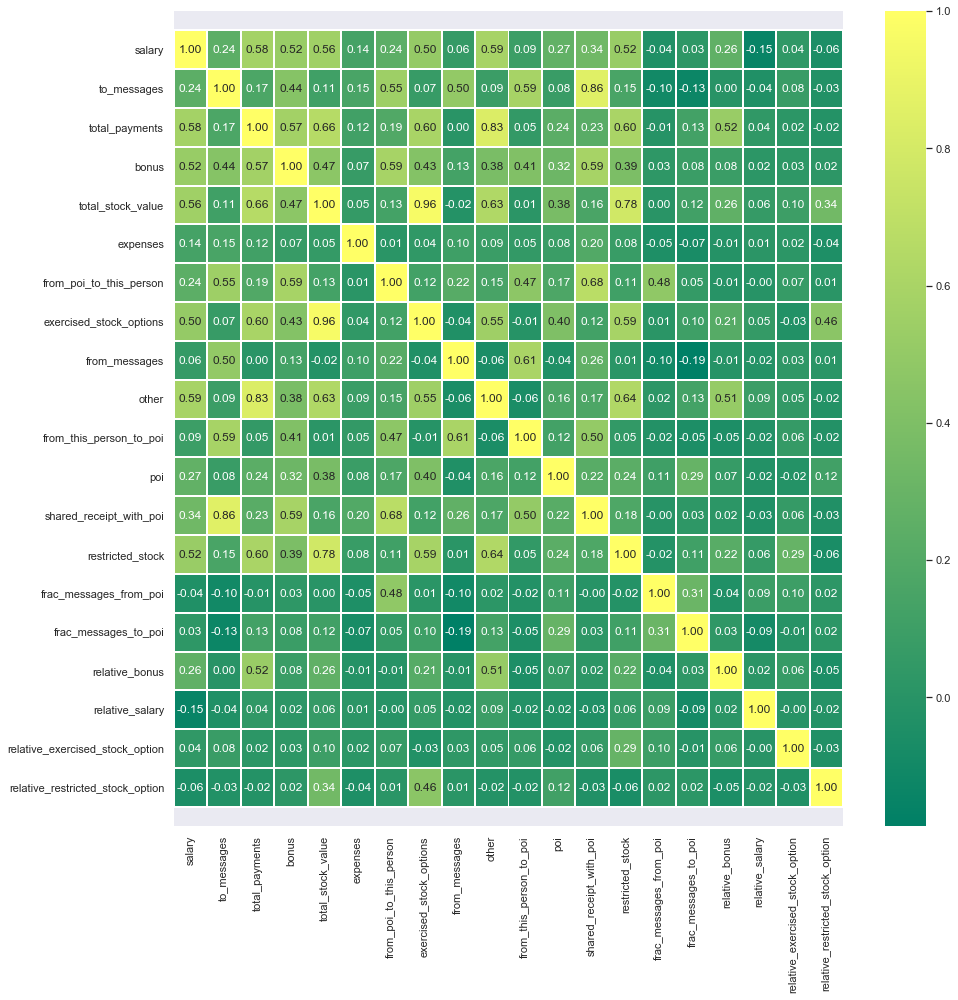

In [44]:
corr_matrix = df2.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=1.0,
                fmt=".2f",
                cmap="summer")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

These new features are less correlated with the initial features list we began with, but there is still some collinearity present amongst the features. Let's address this

### Feature Selection

I use the `SelectFromModel` class to obtain feature selection scores using a random forest classifier and gradient boosting classifier, and determine the best features to use. In addition, we will compute a univariate ANOVA test to determine the most significant features in the set and compare to the results from the tree based classifiers.

In [45]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, f_classif, SelectKBest
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [46]:
X = df2.drop(columns=['poi'],axis=1)
y = df2['poi']

In [47]:
# Split data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

stn = StandardScaler()
X_train_scaled = stn.fit_transform(X_train)
X_test_scaled = stn.transform(X_test)

In [48]:
np.random.seed(42)
feat = SelectFromModel(RandomForestClassifier(n_estimators=100,n_jobs=-1))
feat.fit(X_train_scaled,y_train)
#feat.get_support()

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1))

In [49]:
X_train.columns[feat.get_support()]

Index(['salary', 'bonus', 'total_stock_value', 'expenses',
       'exercised_stock_options', 'other', 'frac_messages_to_poi'],
      dtype='object')

Now check the XGBclassifer

In [52]:
np.random.seed(42)
feat2 = SelectFromModel(XGBClassifier(n_estimators=100,n_jobs=1))
feat2.fit(X_train_scaled,y_train)
feat2.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False])

In [53]:
X_train.columns[feat2.get_support()]

Index(['bonus', 'total_stock_value', 'from_messages',
       'shared_receipt_with_poi', 'frac_messages_from_poi',
       'frac_messages_to_poi', 'relative_salary'],
      dtype='object')

It returns slightly similar results from the random forest, with a few extra features. Not that the total_stock_value and exercised_stock_options are highly correlated with each other. Lets see the contributions to the predictive power using the univariate ANOVA F-test. The F-value essentially measures the degree of variability between groups relative to the variability within groups. A high F-value (small p-value) indicates a feature is significant in terms of its discriminant power between the different classes

In [65]:
np.random.seed(42)
selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X, y)
pp.pprint(sorted(zip(selector.scores_, X.columns),reverse=True))

[(27.424868115330316, 'exercised_stock_options'),
 (23.67759272684032, 'total_stock_value'),
 (15.979606683425999, 'bonus'),
 (12.884438870792334, 'frac_messages_to_poi'),
 (10.972778462722507, 'salary'),
 (8.482277063956806, 'restricted_stock'),
 (8.413637821868647, 'total_payments'),
 (7.477938790161496, 'shared_receipt_with_poi'),
 (4.284824347665078, 'from_poi_to_this_person'),
 (3.9600773954702984, 'other'),
 (2.223561609429177, 'from_this_person_to_poi'),
 (2.0194798393537488, 'relative_restricted_stock_option'),
 (1.7015727945337014, 'frac_messages_from_poi'),
 (1.0242232786527743, 'expenses'),
 (0.8863856790773254, 'to_messages'),
 (0.6312705028389597, 'relative_bonus'),
 (0.1844478897790045, 'from_messages'),
 (0.06866977823327142, 'relative_salary'),
 (0.037828092863329145, 'relative_exercised_stock_option')]


The top two predictors from the Univariate F-test reveal the `exercised_stock_options` and `total_stock_value` to be the main discriminatory predictors in determining a person of interest. Their high correlation (**0.96**) however sugests these variables are basically the same. `exercised_stock_options` was kept since it had a higher correlation with the target variable compared to the `total_stock_value`. The gradient boosting algorithm return similar values to the random forest regressor, with the inclusion of some of the email features. The `frac_messages_from_poi` feature was dropped since its significance was relatively minor in the ANOVA test.

In [55]:
# Define list of features and target variable to use
good_features = ['exercised_stock_options', 
                 'restricted_stock',
                 'bonus', 
                 'frac_messages_to_poi', 
                 'salary',
                 'shared_receipt_with_poi' ,
                  'poi']

To see if these selections indeed help differentiate between the two classes, let's explore some of the variables themselves. Specifically the `frac_messages_to_poi` and `frac_messages_from_poi`

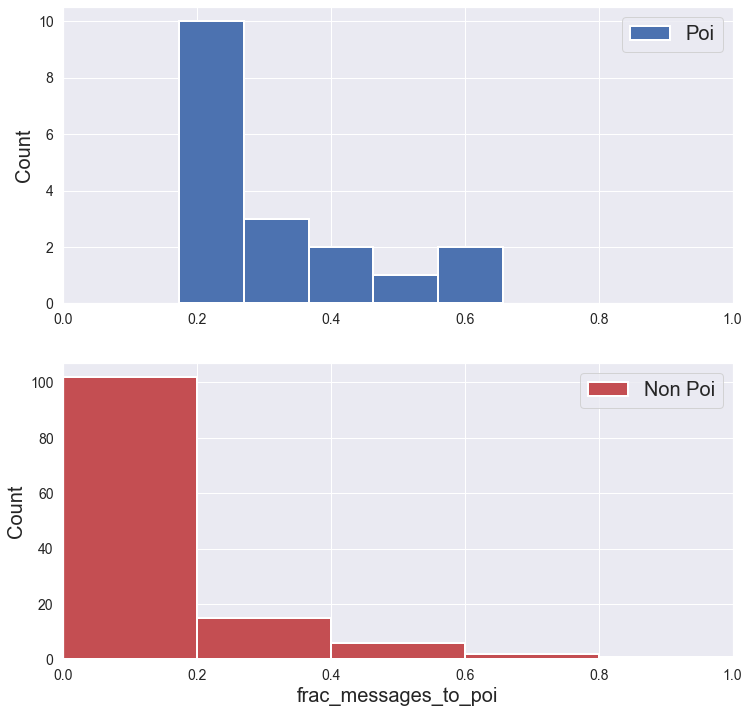

In [57]:
#frac_massages_to_poi
%matplotlib inline

figure, ax = plt.subplots(figsize=(12,12),nrows=2,ncols=1)
ax[0].hist(df2.frac_messages_to_poi[df.poi==1],color='b',bins=5,linewidth=2)
ax[0].set_ylabel("Count",fontsize=20)
ax[0].legend(['Poi'],fontsize=20)
ax[0].set_xlim([0, 1])
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].hist(df2.frac_messages_to_poi[df.poi==0],color='r',bins=5,linewidth=2)
ax[1].set_ylabel("Count",fontsize=20)
ax[1].set_xlabel("frac_messages_to_poi",fontsize=20)
ax[1].legend(['Non Poi'],fontsize=20)
ax[1].set_xlim([0, 1])
ax[1].tick_params(axis='both', which='major', labelsize=14)

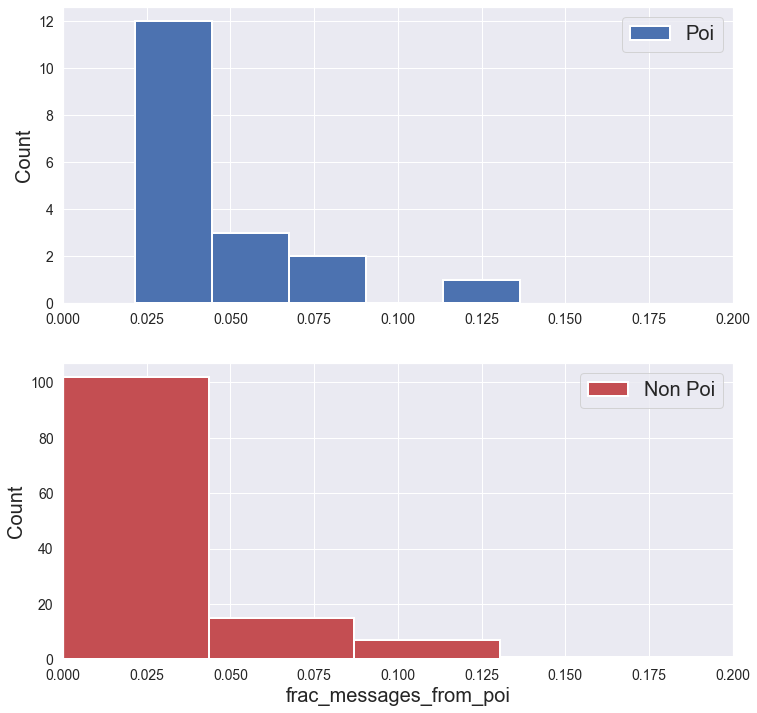

In [58]:
#frac_massages_from_poi
%matplotlib inline

figure, ax = plt.subplots(figsize=(12,12),nrows=2,ncols=1)
ax[0].hist(df2.frac_messages_from_poi[df.poi==1],color='b',bins=5,linewidth=2)
ax[0].set_ylabel("Count",fontsize=20)
ax[0].legend(['Poi'],fontsize=20)
ax[0].set_xlim([0, 0.2])
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[1].hist(df2.frac_messages_from_poi[df.poi==0],color='r',bins=5,linewidth=2)
ax[1].set_ylabel("Count",fontsize=20)
ax[1].set_xlabel("frac_messages_from_poi",fontsize=20)
ax[1].legend(['Non Poi'],fontsize=20)
ax[1].set_xlim([0, 0.2])
ax[1].tick_params(axis='both', which='major', labelsize=14)

Although the population of poi in the `frac_messages_from_poi` feature begins from a fractional value of 0.025, it falls within the general population of the non-pois. The remining trends across both groups as similar as they have the same range and veery similar counts. On the other hand, the `frac_messages_to_poi` shows a more significant shift from the non-poi population, beginning around a fraction of 0.2, with a greater percentage of its population in the higher fraction region. 

In [67]:
 # Extract the features
df3 = df2[good_features]
df3.head()

,exercised_stock_options,restricted_stock,bonus,frac_messages_to_poi,salary,shared_receipt_with_poi,poi
METTS MARK,1297049.0,585062.0,600000.0,0.034483,365788.0,702.0,0.0
BAXTER JOHN C,6680544.0,3942714.0,1200000.0,0.195122,267102.0,740.5,0.0
ELLIOTT STEVEN,4890344.0,1788391.0,350000.0,0.195122,170941.0,740.5,0.0
CORDES WILLIAM R,651850.0,386335.0,750000.0,0.000000,258741.0,58.0,0.0
HANNON KEVIN P,5538001.0,853064.0,1500000.0,0.656250,243293.0,1035.0,1.0


## Dealing with imbalanced data

The preview of the data above reveals a potentially fundamental problem; an imbalanced dataset. Let's confirm this by seeing how the classes are distributed for our target variable

In [68]:
df3['poi'].value_counts()

0.0    126
1.0     18
Name: poi, dtype: int64

In the case of imbalanced data, most machine learning techniques will ignore the minority class, and ultimately perform poorly on that class. This can be a problem in situations where the minority class is the most important, such as in our data. Training a model without accounting for the imbalance may lead to biased predictions and misleading accuracy. One method to deal with such an issue is to oversample the minority class. I will use the **Synthetic Minority Oversampling Technique (SMOTE)** for this purpose. It works by synthesizing new data from existing examples. 

When use any sampling technique ( especially synthetic), you divide your data first and then apply synthetic sampling on the training data only. After you train you use the testing set ( which contains only original samples) to evaluate. This is to avoid a situation where an original sample in test set is also present as a synthetic sample (created based on original sample) in the training test. The caveat with using this technique is there is a trade-off between precision and recall. By using **SMOTE** you can increase recall at the cost of precision. 

In [69]:
X_final = df3.drop(columns=['poi'],axis=1)
y_final = df3['poi']

In [70]:
X_final.shape, y_final.shape

((144, 6), (144,))

In [71]:
np.random.seed(42)
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final,y_final,
                                                                          test_size=0.2,stratify=y_final)


In [72]:
from collections import Counter
print(Counter(y_train_final))
print(Counter(y_test_final))

Counter({0.0: 101, 1.0: 14})
Counter({0.0: 25, 1.0: 4})


Now apply SMOTE oversampling. Normally you'd combine this with undersampling of the majority class, but the dataset is extremely small. So i'll only apply oversampling

In [73]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [74]:
np.random.seed(42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_final,y_train_final)

In [75]:
print("Original Dataset: ",Counter(y_train_final))
print("After resampling: ",Counter(y_train_smote))

Original Dataset:  Counter({0.0: 101, 1.0: 14})
After resampling:  Counter({0.0: 101, 1.0: 101})


# Model selection

I wil compare 4 classification algorithms and select the one with the best initial accuracy score (Without hyperparameter tunning). These are

1. Logistic Regression
2. Gradient boosting classifier
3. Supper vector machine (SVM)
4. Random forest classifier

The idea is to select a classifier that gives us the best detection accuracy. However, isn't the best metric for performance, especially with an unbalanced dataset such as this. I will also look at the precision, recall and their harmonic mean (f1-score). After selecting the best machine learning model, we tune its hyperparameters for better performance.

Let's compare the original dataset to the SMOTE augmented dataset

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [77]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models using default parameters.
    Inputs
        models: a dictionary of different Scikit-Learn machine learning models
        X_train: training data (no labels)
        X_test: testing data (no labels)
        
        y_train: training labels
        y_test: testing labels
        
    Outputs
        model_scores_test = test data score
    '''
    
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores_test={}
    
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        model.fit(X_train,y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores_test[name] = model.score(X_test,y_test)
    
        y_preds = model.predict(X_test)
        
        print(f"Results for {name}: ")
        print(classification_report(y_test,y_preds))
        print("\n")
        print("Confusion matrix")
        print(confusion_matrix(y_test,y_preds))
        print("\n")
        print("\n")
    return model_scores_test

In [78]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "SVC": SVC() ,
         "Random Forest": RandomForestClassifier(),
         "Extreme Gradient Boosting": XGBClassifier()}


# CHeck with original unscaled data
sca = StandardScaler()
X_train_final_scaled = sca.fit_transform(X_train_final)
X_test_final_scaled = sca.transform(X_test_final)

# Check original data
model_scores_test = fit_and_score(models, X_train_final_scaled, X_test_final_scaled, 
                                                    y_train_final, y_test_final)
print("accuracy scores")
model_scores_test



Results for Logistic Regression: 
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        25
         1.0       0.50      0.25      0.33         4

    accuracy                           0.86        29
   macro avg       0.69      0.60      0.63        29
weighted avg       0.84      0.86      0.84        29



Confusion matrix
[[24  1]
 [ 3  1]]




Results for SVC: 
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        25
         1.0       0.00      0.00      0.00         4

    accuracy                           0.86        29
   macro avg       0.43      0.50      0.46        29
weighted avg       0.74      0.86      0.80        29



Confusion matrix
[[25  0]
 [ 4  0]]






C:\Users\ibibe\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for Random Forest: 
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        25
         1.0       0.33      0.25      0.29         4

    accuracy                           0.83        29
   macro avg       0.61      0.58      0.59        29
weighted avg       0.81      0.83      0.82        29



Confusion matrix
[[23  2]
 [ 3  1]]




Results for Extreme Gradient Boosting: 
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        25
         1.0       0.33      0.25      0.29         4

    accuracy                           0.83        29
   macro avg       0.61      0.58      0.59        29
weighted avg       0.81      0.83      0.82        29



Confusion matrix
[[23  2]
 [ 3  1]]




accuracy scores


{'Logistic Regression': 0.8620689655172413,
 'SVC': 0.8620689655172413,
 'Random Forest': 0.8275862068965517,
 'Extreme Gradient Boosting': 0.8275862068965517}

Although the overall accuracies are fairly high for all the algorithms, they all perform badly on the minority class, at most correctly identifying just 1 out of the 4 person's of interest present. Let's see how they perform on the SMOTE resampled data

In [79]:
# Use Synthetic resampled data
sca2 = StandardScaler()
X_train_smote_scaled = sca2.fit_transform(X_train_smote)
X_test_smote_scaled = sca2.transform(X_test_final)

model_scores_test = fit_and_score(models, X_train_smote_scaled, X_test_smote_scaled, 
                                                    y_train_smote, y_test_final)
(model_scores_test)


Results for Logistic Regression: 
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82        25
         1.0       0.30      0.75      0.43         4

    accuracy                           0.72        29
   macro avg       0.62      0.73      0.62        29
weighted avg       0.86      0.72      0.76        29



Confusion matrix
[[18  7]
 [ 1  3]]




Results for SVC: 
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87        25
         1.0       0.38      0.75      0.50         4

    accuracy                           0.79        29
   macro avg       0.66      0.78      0.68        29
weighted avg       0.87      0.79      0.82        29



Confusion matrix
[[20  5]
 [ 1  3]]




Results for Random Forest: 
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86        25
         1.0       0.20      0.25      0.22         4

    accuracy      

{'Logistic Regression': 0.7241379310344828,
 'SVC': 0.7931034482758621,
 'Random Forest': 0.7586206896551724,
 'Extreme Gradient Boosting': 0.7241379310344828}

There has been slight a drop in the overall accuracy for the most part after resampling. However, there has been an improvement in recall for the miniority class which is our main target. Based on these results, we will analyze the logistic regressor and supper vector machine as they provided the best recall on the minority class. 


# Hyperparameter tuning

Hyperparameter tuning is designed to attempt to approve the initial model results if possible. This doesn't always occur as the 
tuned paramters may result in overfitting instead.

Let's construct a pipeline for this. The steps are:

1. Scale data using standard scaler
2. Apply classifiers in a randomized grid search

In [80]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

In [81]:
# Create pipeline for both classifiers
np.random.seed(42)
LR_pipeline = Pipeline([ ('scaler',StandardScaler()),
         ("L_class", LogisticRegression() ) ])

SVC_pipeline = Pipeline( [ ('scaler',StandardScaler()),
         ("SVC_class", SVC() ) ])

In [82]:
# Create a dictionary for Logistic Regressor
logistic_grid_params = {'L_class__penalty': ['l1','l2'],
                    'L_class__solver': ['liblinear'],
                    'L_class__class_weight': [None,"balanced"],
                   'L_class__C': np.logspace(-4,4,20)}

svc_grid_params = {'SVC_class__C': np.logspace(-4,4,20),
                  'SVC_class__kernel':  ['rbf','linear','sigmoid'],
                  'SVC_class__class_weight': [None,"balanced"] }

In [83]:
# Run A randomizedSearch to obtain optimal parameters for the 
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LR_pipeline,
                              param_distributions=logistic_grid_params,
                              cv=None,
                              n_iter=20,
                              verbose=0)

# Fit random hyperparamter search model for LogisticRegression
rs_log_reg.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('L_class',
                                              LogisticRegression())]),
                   n_iter=20,
                   param_distributions={'L_class__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'L_class__class_weight': [None,
                                                                  'balanced'],
                                        'L_class__penalty': ['l1', 'l2'],
                                        'L_class__solver': ['liblinear']})

In [84]:
rs_log_reg.best_params_

{'L_class__solver': 'liblinear',
 'L_class__penalty': 'l1',
 'L_class__class_weight': None,
 'L_class__C': 1.623776739188721}

In [85]:
rs_log_reg.best_score_

0.7869512195121953

Let's now examine the support vector machine

In [86]:
np.random.seed(42)

rs_svc_reg = RandomizedSearchCV(SVC_pipeline,
                                param_distributions=svc_grid_params,
                                cv=None,
                                n_iter=20,
                                verbose=0)

rs_svc_reg.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('SVC_class', SVC())]),
                   n_iter=20,
                   param_distributions={'SVC_class__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'SVC_class__class_weight': [None,
                                                                    'balanced'],
                                        'SVC_class__kernel': ['rbf', 'linear',
                                                              'sigmoid']})

In [87]:
rs_svc_reg.best_params_

{'SVC_class__kernel': 'linear',
 'SVC_class__class_weight': 'balanced',
 'SVC_class__C': 78.47599703514607}

In [88]:
rs_svc_reg.best_score_

0.8069512195121952

The support vector machine had the best score between both classifiers.  

 # Make predictions

In [89]:
from mlxtend.plotting import plot_confusion_matrix

In [90]:
poi = rs_svc_reg.predict(X_test_final)

In [91]:
print(classification_report(y_test_final,poi))

              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84        25
         1.0       0.33      0.75      0.46         4

    accuracy                           0.76        29
   macro avg       0.64      0.76      0.65        29
weighted avg       0.86      0.76      0.79        29



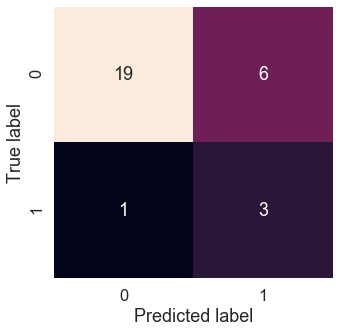

In [94]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test_final,poi),
                    annot=True,
                    cbar = False)
    
plt.xlabel("Predicted label")
plt.ylabel("True label");


Let's see the results for the logistic regressor

In [95]:
poi2 = rs_log_reg.predict(X_test_final)

In [96]:
print(classification_report(y_test_final,poi2))

              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80        25
         1.0       0.22      0.50      0.31         4

    accuracy                           0.69        29
   macro avg       0.56      0.61      0.55        29
weighted avg       0.81      0.69      0.73        29



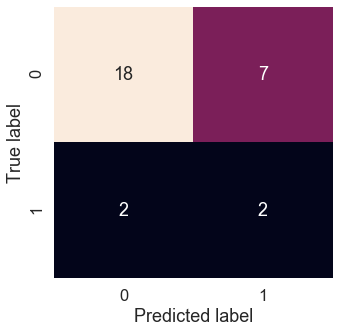

In [99]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test_final,poi2),
                    annot=True,
                    cbar = False)
    
plt.xlabel("Predicted label")
plt.ylabel("True label");


The SVC classifier still does a better job than the logistic regressor. However, it performs slightly worse on the test data
compared to the initial classifier with the default parameters. Therefore we will utilize the original SVC model for our 
final output

## Final results

0.7931034482758621


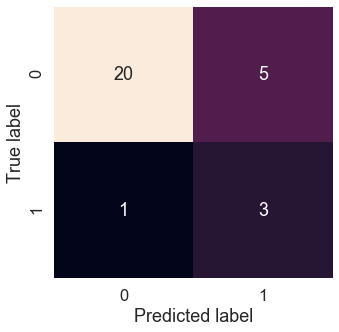

In [101]:
np.random.seed(42)

# Scaled resampled training data (smote) and test data
sca = StandardScaler()
X_scaled_train_smote = sca.fit_transform(X_train_smote)
X_scaled_test = sca.transform(X_test_final)

model = SVC()
model.fit(X_scaled_train_smote,y_train_smote)

# Make predictions on test and training data
poi_final = model.predict(X_scaled_test)

print(model.score(X_scaled_test,y_test_final))


sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test_final,poi_final),
                    annot=True,
                    cbar = False)
    
plt.xlabel("Predicted label")
plt.ylabel("True label");

In [102]:
print(classification_report(y_test_final,poi_final))

              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87        25
         1.0       0.38      0.75      0.50         4

    accuracy                           0.79        29
   macro avg       0.66      0.78      0.68        29
weighted avg       0.87      0.79      0.82        29



We achieved an F1-score of **0.50**, with a recall of **0.75** on the minority class. We also had high precision in detecting non persons of interest. A high recall would be desirable in a situation like this since the minority class accounts for a very small fraction of the population. Therefore for a larger data set the number of false positives should theoretically be manageble without missing too many persons of interest.